In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('data.tsv', header=None, sep='\t')

In [2]:
""" Simple preprocessing of the dataset """

# Drop URLs and last column which contains NaN for some reason
df = df.drop(columns=[0])
df = df.drop(columns=[8])
# Rename columns so they are more readable
df = df.rename(columns={1: "name", 2: "price", 3: "size", 4: "battery", 5: "procfreq", 6: "resolution", 7: "display"})

# Prices are with commas and spaces (between thousands and hundreds), replace them with dots and remove spaces
df['price'] = df['price'].str.replace(',', '.')
df['price'] = df['price'].str.replace(' ', '').astype(float)

# Create a new column for brand
df["brand"] = df["name"].str.split(' ').str[0].str.split('/').str[0]

df.head()

,name,price,size,battery,procfreq,resolution,display,brand
0,Honor Magic6 Pro 5G Dual SIM,876.2,6.8,5600.0,3.30,180.0,OLED,Honor
1,Samsung SM-A556B Galaxy A55 5G Dual SIM,321.0,6.6,5000.0,2.75,50.0,Super AMOLED,Samsung
2,Samsung SM-A256B Galaxy A25 5G Dual SIM,198.9,6.5,5000.0,2.40,50.0,Super AMOLED,Samsung
3,Samsung SM-A356B Galaxy A35 5G Dual SIM,239.9,6.6,5000.0,2.40,50.0,Super AMOLED,Samsung
4,Samsung SM-A156B Galaxy A15 5G Dual SIM,163.3,6.5,5000.0,2.20,50.0,Super AMOLED,Samsung


In [3]:
""" Join similar display types """

df['display'] = df['display'].str.lower()

displays = df['display'].unique().astype(str)

# Join AMOLED groups together
amoled = [d for d in displays if 'amoled' in d]
df = df.replace(amoled, 'AMOLED')

# Join LCD groups together
lcd = [x for x in displays if 'lcd' in x]
df = df.replace(lcd, 'LCD')

# Join OLED groups together
oled = [x for x in displays if 'oled' in x and 'amoled' not in x]
df = df.replace(oled, 'OLED')

# Join the rest of the displays together
rest = [x for x in displays if x not in amoled and x not in lcd and x not in oled]
df = df.replace(rest, 'Others')

In [4]:
df

,name,price,size,battery,procfreq,resolution,display,brand
0,Honor Magic6 Pro 5G Dual SIM,876.2,6.80,5600.0,3.30,180.0,OLED,Honor
1,Samsung SM-A556B Galaxy A55 5G Dual SIM,321.0,6.60,5000.0,2.75,50.0,AMOLED,Samsung
2,Samsung SM-A256B Galaxy A25 5G Dual SIM,198.9,6.50,5000.0,2.40,50.0,AMOLED,Samsung
3,Samsung SM-A356B Galaxy A35 5G Dual SIM,239.9,6.60,5000.0,2.40,50.0,AMOLED,Samsung
4,Samsung SM-A156B Galaxy A15 5G Dual SIM,163.3,6.50,5000.0,2.20,50.0,AMOLED,Samsung
...,...,...,...,...,...,...,...,...
145,Xiaomi 12T,358.3,6.67,5000.0,2.85,108.0,AMOLED,Xiaomi
146,POCO M5s Dual SIM,121.0,6.43,5000.0,2.05,64.0,AMOLED,POCO
147,POCO M5 Dual SIM,152.6,6.58,5000.0,2.20,50.0,LCD,POCO
148,Xiaomi Redmi 10 5G NFC Dual SIM,118.9,6.58,5000.0,2.20,50.0,LCD,Xiaomi


# Data analysis

In [5]:
print(df.describe(include="all").to_string() + "\n")

for i in df.columns[1:-2]:
    print(i)
    print(f"\tmedian: {df[i].median()}")
    print(f"\tmode: {df[i].mode().iloc[0]}")

                                      name        price        size     battery    procfreq  resolution display   brand
count                                  150   150.000000  148.000000   148.00000  147.000000  148.000000     148     150
unique                                 149          NaN         NaN         NaN         NaN         NaN       4      13
top     Xiaomi Redmi Note 12S NFC Dual SIM          NaN         NaN         NaN         NaN         NaN  AMOLED  Xiaomi
freq                                     2          NaN         NaN         NaN         NaN         NaN      75      39
mean                                   NaN   361.902667    6.562095  4966.77027    2.509592   64.824324     NaN     NaN
std                                    NaN   312.957609    0.445655   368.12487    0.471057   38.659637     NaN     NaN
min                                    NaN    74.300000    3.400000  3700.00000    1.600000    8.000000     NaN     NaN
25%                                    N

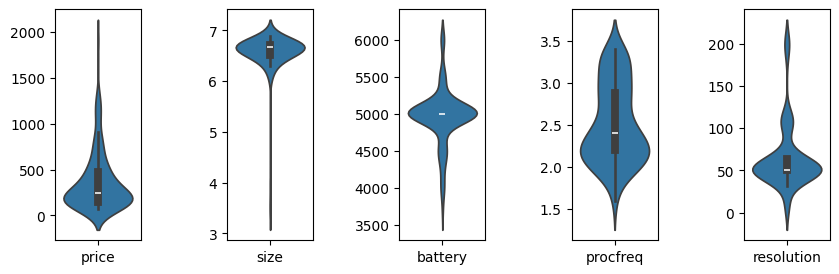

In [6]:
""" Plotting violin plots to show value distributions for quantitative variables """

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))

for i, column in enumerate(df.columns[1:-2]):
    sns.violinplot(data=df[[column]], ax=axes[i])

# Adds space between plots
plt.subplots_adjust(wspace=1)
# plt.savefig('violin_plots.png', bbox_inches='tight')

<Axes: xlabel='brand', ylabel='Count'>

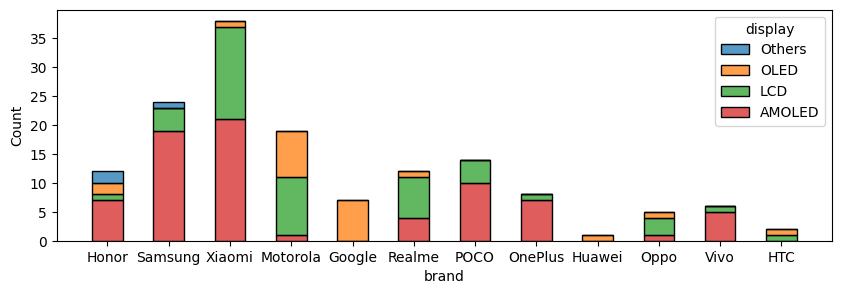

In [7]:
""" Plotting bar plots to show value distributions for categorical variables """

fig, axes = plt.subplots(figsize=(10, 3))
sns.histplot(df, x='brand', hue='display', hue_order=["Others", "OLED", "LCD", "AMOLED"], multiple='stack', ax=axes, shrink=0.5)
# plt.savefig('hist_plots.png', bbox_inches='tight')

<Axes: xlabel='procfreq', ylabel='price'>

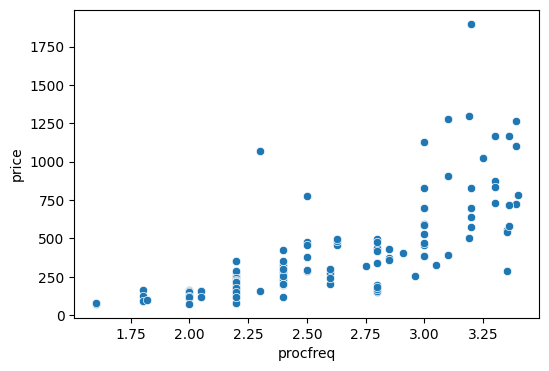

In [8]:
""" Possible correlation between price and processor frequency """

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df, x='procfreq', y='price')

# plt.savefig('scatter_plot.png')

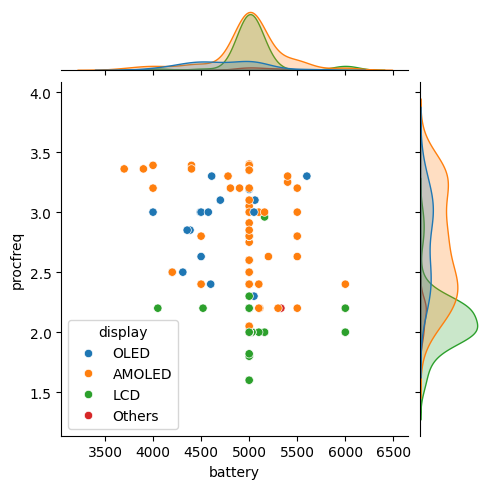

In [9]:
sns.jointplot(data=df, x='battery', y='procfreq', hue='display', height=5)
# plt.savefig('joint_plot.png')

Overall number of phones:  150
Number of phones from brands with more than 5 products:  141
Number of discarded phones:  9


<Axes: xlabel='brand', ylabel='price'>

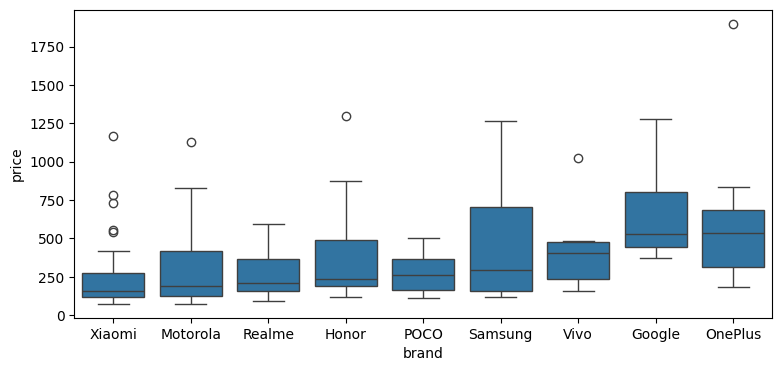

In [10]:
""" Box plot to show price distributions for brands with more than 5 products """

brand_counts = df['brand'].value_counts() > 5
discarded_brands = brand_counts[~brand_counts].index
df2 = df[df['brand'].isin(brand_counts[brand_counts].index)]

print("Overall number of phones: ", len(df))
print("Number of phones from brands with more than 5 products: ", len(df2))
print("Number of discarded phones: ", len(df[df['brand'].isin(discarded_brands)]))

# Calculate medians for each brand to sort the boxplot later
sorted_medians = df2.groupby('brand')['price'].median().sort_values()

fig, ax = plt.subplots(figsize=(9, 4))
sns.boxplot(data=df2, x='brand', y='price', order=sorted_medians.index.to_list(), ax=ax)
# plt.savefig('box_plot.png', bbox_inches='tight')

# Correlation analysis

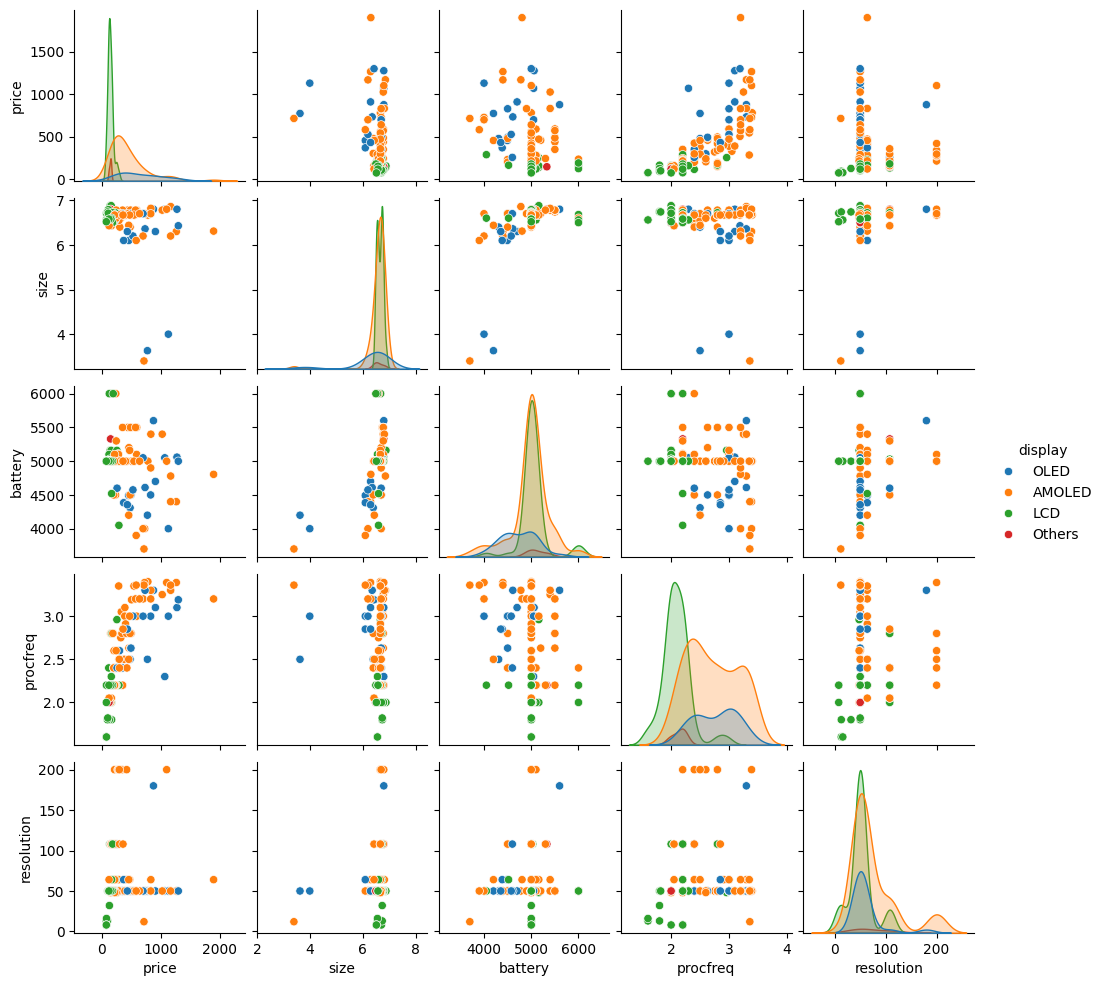

In [11]:
""" Pair plot to show relationships between (quantitative) variables """

sns.pairplot(df, hue="display", height=2)
# plt.savefig('pair_plot.png')

In [12]:
""" Calculating pearson coefficient for price vs procfreq """

df_pearson = df.dropna()

price_avg = df_pearson["price"].mean()
proc_avg = df_pearson["procfreq"].mean()
price_std = df_pearson["price"].std()
proc_std = df_pearson["procfreq"].std()
n = len(df_pearson)

pearson = 0
for idx, row in df_pearson.iterrows():
    pearson += (row["price"] - price_avg) * (row["procfreq"] - proc_avg)
pearson /= (n - 1) * price_std * proc_std  
print("Pearson coefficient:", pearson)

r = stats.spearmanr(df_pearson["price"], df_pearson["procfreq"])
print("Spearman coefficient:", r.statistic)

Pearson coefficient: 0.7534088629735924
Spearman coefficient: 0.8630207289974943


In [13]:
""" Computing correlation matrix for quantitative variables """

# Pick only quantitative variables
quantitative = ["price", "size", "battery", "procfreq", "resolution"]

corr = df[quantitative].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,size,battery,procfreq,resolution
price,1.000000,-0.258802,-0.271038,0.753409,0.016181
size,-0.258802,1.000000,0.514851,-0.175707,0.159882
battery,-0.271038,0.514851,1.000000,-0.269698,0.070780
procfreq,0.753409,-0.175707,-0.269698,1.000000,0.093753
resolution,0.016181,0.159882,0.070780,0.093753,1.000000


Overall number of phones:  150
Number of phones with display type, which is in at least 4 products:  145
Number of discarded phones:  3


<Axes: xlabel='display', ylabel='procfreq'>

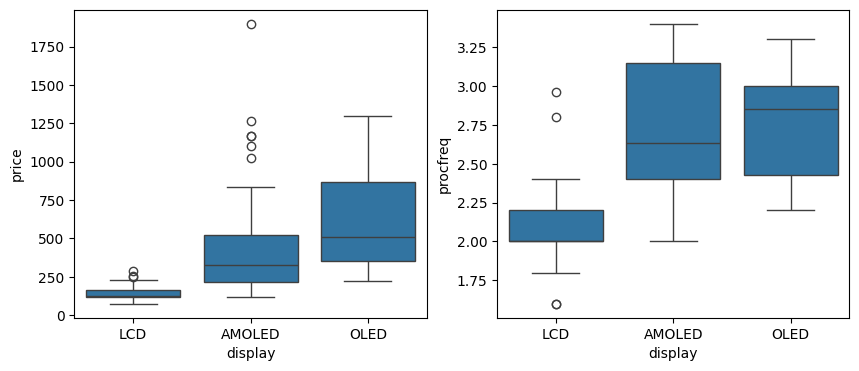

In [14]:
""" Same as previous cell but for displays """

display_counts = df['display'].value_counts() > 4
discarded_displays = display_counts[~display_counts].index
df2 = df[df['display'].isin(display_counts[display_counts].index)]

print("Overall number of phones: ", len(df))
print("Number of phones with display type, which is in at least 4 products: ", len(df2))
print("Number of discarded phones: ", len(df[df['display'].isin(discarded_displays)]))

# Calculate medians for each brand to sort the boxplot later
sorted_medians = df2.groupby('display')['price'].median().sort_values()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.boxplot(data=df2, x='display', y='price', order=sorted_medians.index.to_list(), ax=axes[0])
sns.boxplot(data=df2, x='display', y='procfreq', order=sorted_medians.index.to_list(), ax=axes[1])
# plt.savefig('box_plot_display.png', bbox_inches='tight')

# Missing values

In [15]:
""" Show phones with NaN value in at least 1 attribute """
df_nan = df[df.isnull().any(axis=1)]
df_nan

,name,price,size,battery,procfreq,resolution,display,brand
29,Xiaomi Redmi 13 Dual SIM,150.4,NaN,NaN,NaN,NaN,NaN,Xiaomi
43,Oppo A79 5G Dual SIM,170.8,6.72,5000.0,NaN,50.0,LCD,Oppo
122,ThinkPhone/8GB/256GB/Carbon Black,599.0,NaN,NaN,NaN,NaN,NaN,ThinkPhone


# Outlier detection

In [16]:
""" Calculate outliers based on |z-index| > 3 """

# Calculate z-scores for each row
z_scores = abs(stats.zscore(df[quantitative], nan_policy='omit'))
# Outliers are rows where at least one z-score is greater than 3
outliers = z_scores[z_scores > 3].any(axis=1)
# Pick outliers
df_outliers = df[outliers]

# For each row store the variable name responsible for being an outlier
outlier_variables = []
for idx, row in z_scores[outliers].iterrows():
    outlier_variables.append(z_scores.columns[row.argmax()])

df_outliers["outlier_variables"] = outlier_variables
df_outliers.loc[:, df_outliers.columns != 'name']

,price,size,battery,procfreq,resolution,display,brand,outlier_variables
6,340.7,6.67,5000.0,2.80,200.0,AMOLED,Xiaomi,resolution
8,214.9,6.67,5000.0,2.20,200.0,AMOLED,Xiaomi,resolution
22,272.6,6.67,5000.0,2.60,200.0,AMOLED,Xiaomi,resolution
52,773.4,3.63,4200.0,2.50,50.0,OLED,Motorola,size
57,1129.3,4.00,4000.0,3.00,50.0,OLED,Motorola,size
70,420.2,6.67,5000.0,2.80,200.0,AMOLED,Xiaomi,resolution
78,1298.8,6.43,5000.0,3.19,50.0,OLED,Honor,price
90,1898.8,6.31,4805.0,3.20,64.0,AMOLED,OnePlus,price
93,1100.6,6.80,5000.0,3.39,200.0,AMOLED,Samsung,resolution
96,281.1,6.67,5100.0,2.40,200.0,AMOLED,Xiaomi,resolution


In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

c:\Users\Adam\Documents\school\MIT\3sem\MIT_UPA_team_projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Adam\Documents\school\MIT\3sem\MIT_UPA_team_projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


                                            name   price  size  battery  procfreq  resolution display     brand
52                     Motorola Razr 50 Dual SIM   773.4  3.63   4200.0      2.50        50.0    OLED  Motorola
57               Motorola Razr 50 Ultra Dual SIM  1129.3  4.00   4000.0      3.00        50.0    OLED  Motorola
90                               OnePlus Open 5G  1898.8  6.31   4805.0      3.20        64.0  AMOLED   OnePlus
113  Samsung SM-F731B Galaxy Z Flip5 5G Dual SIM   714.7  3.40   3700.0      3.36        12.0  AMOLED   Samsung
28                Huawei Pura 70 Pro 5G Dual SIM  1068.6  6.80   5050.0      2.30        50.0    OLED    Huawei


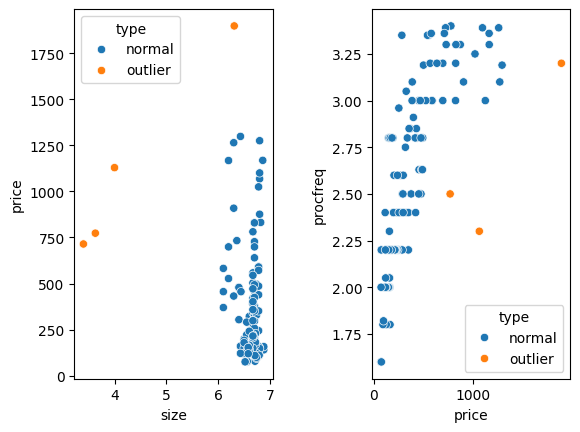

In [18]:
""" Simple outlier detection using KMeans """

def kmeans_clusters(df_cluster, cols, ax, n_clusters=5, thr=4):
    # Take only price and size as an example
    df2 = df_cluster.dropna()[cols]

    # Scale the data using z-score
    scaler = StandardScaler()
    df2 = scaler.fit_transform(df2)

    # Fit clusters
    dbscan = KMeans(n_clusters=n_clusters, random_state=0)
    labels = dbscan.fit_predict(df2)

    # Pick the clusters with amount of points lesser than threshold
    outlier_labels = pd.Series(labels).value_counts() <= thr
    # Pick the indexes of outliers
    outliers_idxs = np.where(np.isin(labels, outlier_labels[outlier_labels].index))[0]
    outliers = df_cluster.dropna().iloc[outliers_idxs]
    
    # Plotting the clusters
    df_tmp = df_cluster.dropna()
    new_col = outlier_labels[labels].to_list()
    new_col = ["outlier" if x else "normal" for x in new_col]
    df_tmp['type'] = new_col
    sns.scatterplot(data=df_tmp, x=cols[0], y=cols[1], hue="type", ax=ax)

    return outliers

fig, ax = plt.subplots(1, 2)

outliers1 = kmeans_clusters(df, ["size", "price"], ax[0])
outliers2 = kmeans_clusters(df, ["price", "procfreq"], ax[1], n_clusters=8)

overall_outliers = pd.concat([outliers1, outliers2]).drop_duplicates()
print(overall_outliers.to_string())

plt.subplots_adjust(wspace=0.5)
# plt.savefig('kmeans_clusters.png', bbox_inches='tight')